In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import files
uploaded = files.upload()


Saving train.csv to train.csv
Saving test.csv to test.csv


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path after uploading via files.upload()
df = pd.read_csv('/content/train.csv')

# Display first few rows
df.head(100)






,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,NaN,9765,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,NaN,Shed,480,4,2009,WD,Normal,185000
96,97,20,RL,78.0,10264,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,214000
97,98,20,RL,73.0,10921,Pave,NaN,Reg,HLS,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,94750
98,99,30,RL,85.0,10625,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,Shed,400,5,2010,COD,Abnorml,83000


<Axes: >

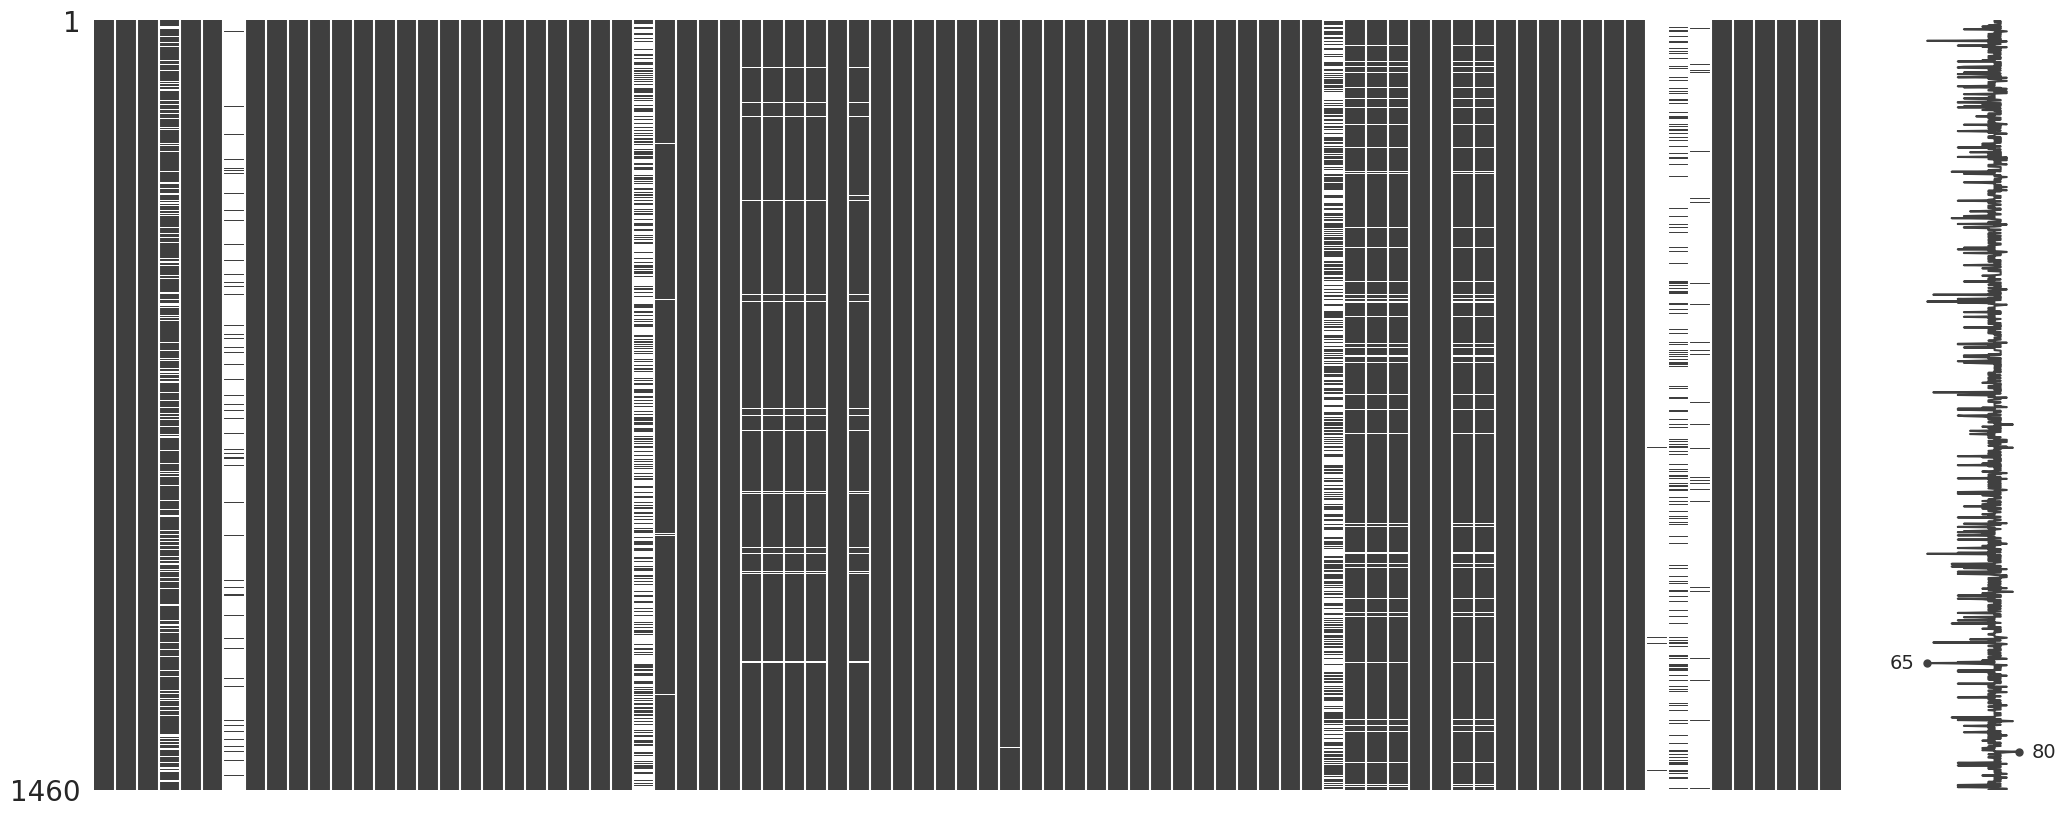

In [19]:
import missingno as msno
!pip install missingno
msno.matrix(df)

Distribution of Target Variable


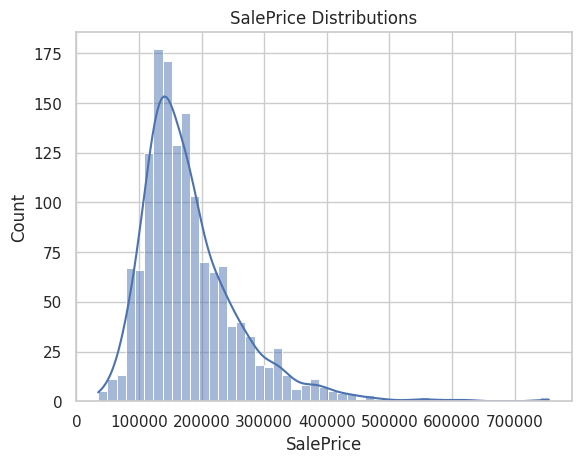

In [21]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("SalePrice Distribution")
plt.show()


Correlation Heatmap (Top Features)

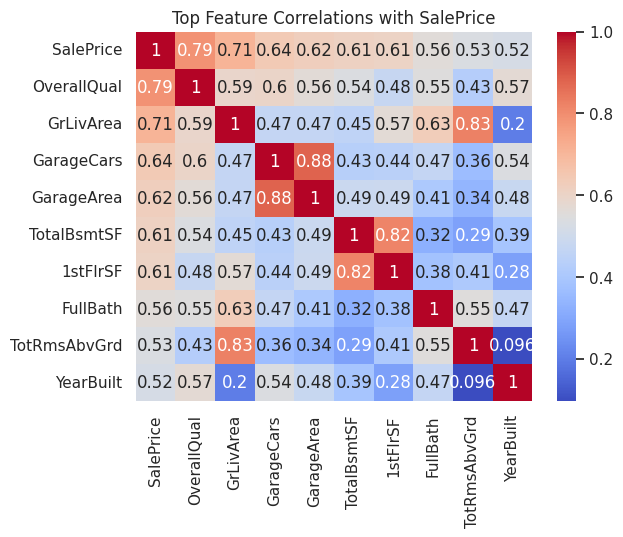

In [22]:
correlation = df.corr(numeric_only=True)
top_corr = correlation['SalePrice'].sort_values(ascending=False).head(10)
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Feature Correlations with SalePrice")
plt.show()


# Data Cleaning & Preprocessing
Drop columns with too many missing values

In [26]:
df = df.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], errors='ignore')


Handle Missing Values

In [34]:
# Fill numeric with median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])
df.sample(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
155,156,50,RL,60.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,4,2008,WD,Normal,79000
112,113,60,RL,77.0,9965,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,10,2007,New,Partial,383970
165,166,190,RL,62.0,10106,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,127500
1149,1150,70,RM,50.0,9000,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,7,2009,WD,Normal,143000
927,928,60,RL,69.0,9900,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdPrv,Shed,0,4,2008,WD,Normal,176000
568,569,50,RL,79.0,12327,Pave,Grvl,IR1,Low,AllPub,...,0,Gd,MnPrv,Shed,0,9,2009,WD,Normal,316600
774,775,20,RL,110.0,14226,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,7,2007,New,Partial,395000
40,41,20,RL,84.0,8658,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,GdWo,Shed,0,12,2006,WD,Abnorml,160000
1320,1321,20,RL,70.0,8400,Pave,Grvl,Reg,Lvl,AllPub,...,0,Gd,MnPrv,Shed,0,6,2009,WD,Normal,156500
291,292,190,RL,55.0,5687,Pave,Grvl,Reg,Bnk,AllPub,...,0,Gd,MnPrv,Shed,0,3,2008,WD,Normal,135900


 Convert categorical variables


In [35]:
df = pd.get_dummies(df, drop_first=True)


# Train/Test Split
Separate target and features

In [39]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']


Split into training and test sets

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Train Models
 Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


## Model Evaluation
Define Evaluation Function

In [43]:
def evaluate_model(name, y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")


Evaluate Both Models

In [45]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.2f}, R²: {r2:.2f}")


# Feature Importance (Random Forest)

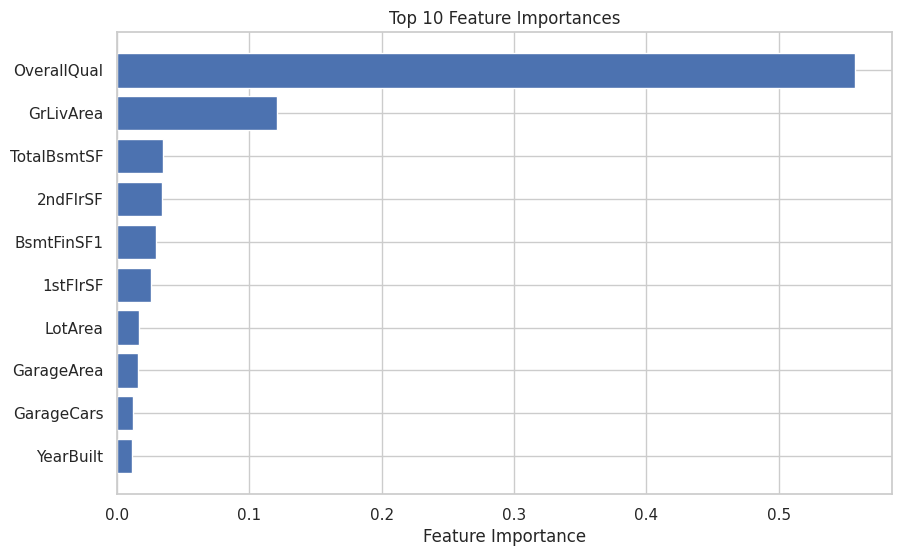

In [46]:
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Feature Importance")
plt.show()


# Save Model

In [47]:
import joblib
joblib.dump(rf, 'house_price_model.pkl')


['house_price_model.pkl']